# EDA

### Begin with the setup

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os # provides functions for interacting with operating system
from sqlalchemy import create_engine # for creating an engine used in plotting
from math import radians, sin, cos, sqrt, atan2 # to help perform geographical location calc

from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:

load_dotenv() # takes environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Retrieving Data from the DB
DB_STRING = os.getenv('DB_STRING') # gets database string DB_STRING from .env file and assigns it as value for new variable DB_STRING
db = create_engine(DB_STRING) # creates engine from database string DB_STRING




### DB Import and Save to CSV

In [3]:
### DB IMPORT, uncomment to use ###
## Use SQL string to join tables on house_id and id
#query_string = "SELECT * FROM EDA.king_county_house_sales kchs JOIN EDA.king_county_house_details kchd ON kchs.house_id = kchd.id;" 

## Reading from DB and creating a DF and CSV file
#df = pd.read_sql(query_string, db) # read queried data from SQL database into pandas dataframe
#df.to_csv('King_County_House_prices_dataset.csv',index=False) # export the data to a csv-file

## Recreate DF using CSV
df = pd.read_csv('data/King_County_House_prices_dataset.csv')



### DB Analysis

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


### Cleaning Up Data

In [4]:
## Time to clean the df up

## Too many floats and need to fix some fields

# Make NAN into 0 and make column int instead of float
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].astype(int)

# Will strip off 0s at the end of the years that were originally in the yr_renovated column
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: int(str(x).rstrip('0')) if x > 0 else int(x))

df

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,21593,263000018,3.000,2.500,1530.000,1131.000,3.000,...,8,1530.000,0.000,2009,0,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,21594,6600060120,4.000,2.500,2310.000,5813.000,2.000,...,8,2310.000,0.000,2014,0,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,21595,1523300141,2.000,0.750,1020.000,1350.000,2.000,...,7,1020.000,0.000,2009,0,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,21596,291310100,3.000,2.500,1600.000,2388.000,2.000,...,8,1600.000,0.000,2004,0,98027,47.535,-122.069,1410.000,1287.000


In [5]:
## Had error with sqft_basement and found NAN values, fixing those
df['sqft_basement'] = df['sqft_basement'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].astype(int)

## Checking columns to see if there are values in the float other than pure int
## For example: price, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15

df['has_decimal'] = df['price'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_living'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_lot'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_above'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['floors'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['bedrooms'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['bathrooms'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_basement'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_living15'].apply(lambda x: (x - int(x)) != 0)
df['has_decimal'] = df['sqft_lot15'].apply(lambda x: (x - int(x)) != 0)

## Note: Floors, Bedrooms and Bathrooms may contain float values, but should they??
## There are 2078 entries with floors with .5
## 14898 entries with bathrooms like 2.25 or .75

# Filter rows with non-zero decimal parts
rows_with_decimals = df[df['has_decimal']]
print(rows_with_decimals)


Empty DataFrame
Columns: [date, price, house_id, id, id.1, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, has_decimal]
Index: []

[0 rows x 24 columns]


In [18]:
df.info()

#Still some columns with floats that could be converted for easier use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      21597 non-null  object 
 1   price                     21597 non-null  int64  
 2   house_id                  21597 non-null  int64  
 3   bedrooms                  21597 non-null  int64  
 4   bathrooms                 21597 non-null  int64  
 5   sqft_living               21597 non-null  int64  
 6   sqft_lot                  21597 non-null  int64  
 7   floors                    21597 non-null  int64  
 8   waterfront                21597 non-null  int64  
 9   view                      21597 non-null  int64  
 10  condition                 21597 non-null  int64  
 11  grade                     21597 non-null  int64  
 12  sqft_above                21597 non-null  int64  
 13  sqft_basement             21597 non-null  int64  
 14  yr_bui

In [6]:
## Columns that need to be ints: 
## price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, sqft_above, sqft_basement, sqft_living15, sqft_lot15

# Columns to convert from float to int
columns_to_convert = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15','yr_renovated'
]

# Convert specified columns to integer type
df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)

#df = df.drop(columns=('has_decimal'))

## DROP ID TABLES
df.drop(["id", "id.1"], axis=1, inplace=True)

## Made zipcode into a string after reading some articles on how to use them
#df['zipcode'] = df['zipcode'].astype(str)

print(df.dtypes)  # Check the data types

date              object
price              int64
house_id           int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
has_decimal         bool
dtype: object


In [7]:
#df['date']

## Creating variables to assess bundled values (totals)
df['total_roooms'] = df['bedrooms'] + df['bathrooms']
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['total_sqft15'] = df['sqft_living15'] + df['sqft_lot15']

df.head()


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_decimal,total_roooms,total_sqft,total_sqft15
0,2014-10-13,221900,7129300520,3,1,1180,5650,1,0,0,...,0,98178,47.511,-122.257,1340,5650,False,4,6830,6990
1,2014-12-09,538000,6414100192,3,2,2570,7242,2,0,0,...,1991,98125,47.721,-122.319,1690,7639,False,5,9812,9329
2,2015-02-25,180000,5631500400,2,1,770,10000,1,0,0,...,0,98028,47.738,-122.233,2720,8062,False,3,10770,10782
3,2014-12-09,604000,2487200875,4,3,1960,5000,1,0,0,...,0,98136,47.521,-122.393,1360,5000,False,7,6960,6360
4,2015-02-18,510000,1954400510,3,2,1680,8080,1,0,0,...,0,98074,47.617,-122.045,1800,7503,False,5,9760,9303


### TESTING PLOTS

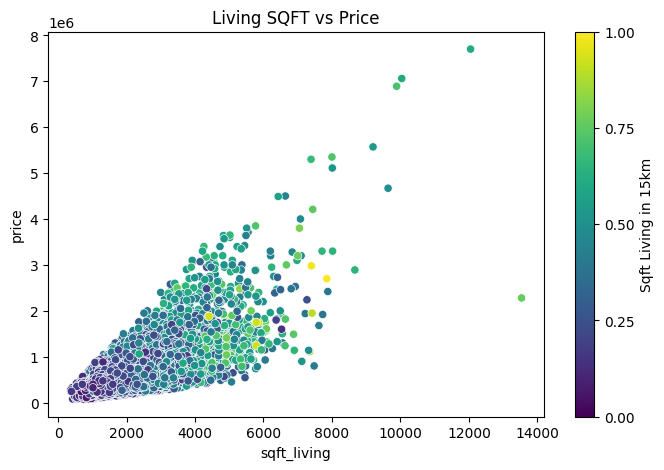

In [11]:
## Creating a normalized value of sqft_living15 to use as a hue

df['sqft_living15_normalized'] = (df['sqft_living15'] - df['sqft_living15'].min()) / (df['sqft_living15'].max() - df['sqft_living15'].min())

# Show the DataFrame to verify the new normalized column
#print(df[['house_id', 'sqft_living15', 'sqft_living15_normalized']])

scatter = sns.scatterplot(data=df, y='price', x='sqft_living', hue='sqft_living15_normalized', palette='viridis')
plt.title(
    label='Living SQFT vs Price'
)

scatter.legend_.remove()  # Remove default legend
cbar = plt.colorbar(scatter.collections[0], ticks=[0, 0.25, 0.5, 0.75, 1])  # Specify ticks
cbar.set_label('Sqft Living in 15km')

plt.show()

In the plot: Living space against, prices but using a hue to show total sqft (which includes house and lot)
This shows the price vs house size, but in addition to showing that as you get bigger houses you also tend to see bigger lot sizes, but not always, it is rare to see a small house with a large lot - thus no or few yellow approach the origin

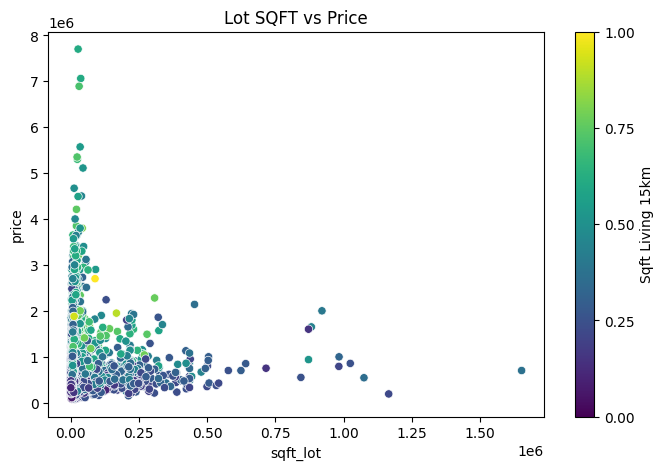

In [22]:
scatter = sns.scatterplot(data=df, x='sqft_lot', y='price', hue='sqft_living15_normalized', palette='viridis')
plt.title(
    label='Lot SQFT vs Price'
)

scatter.legend_.remove()  # Remove default legend
cbar = plt.colorbar(scatter.collections[0], ticks=[0, 0.25, 0.5, 0.75, 1])  # Specify ticks
cbar.set_label('Sqft Living 15km')


plt.show() 



Opposite of the previous plot in a way, this is showing lot size per price, with a huge for the living space.

We see that most lot sizes remain near 0 and get a better understanding of how increasing the lot size doesn't necessarily mean price increase nor house size increase. But most cases remain near origin. The Y axis shows us with price you can get some increase of living but also not lot (meaning likely in a city)

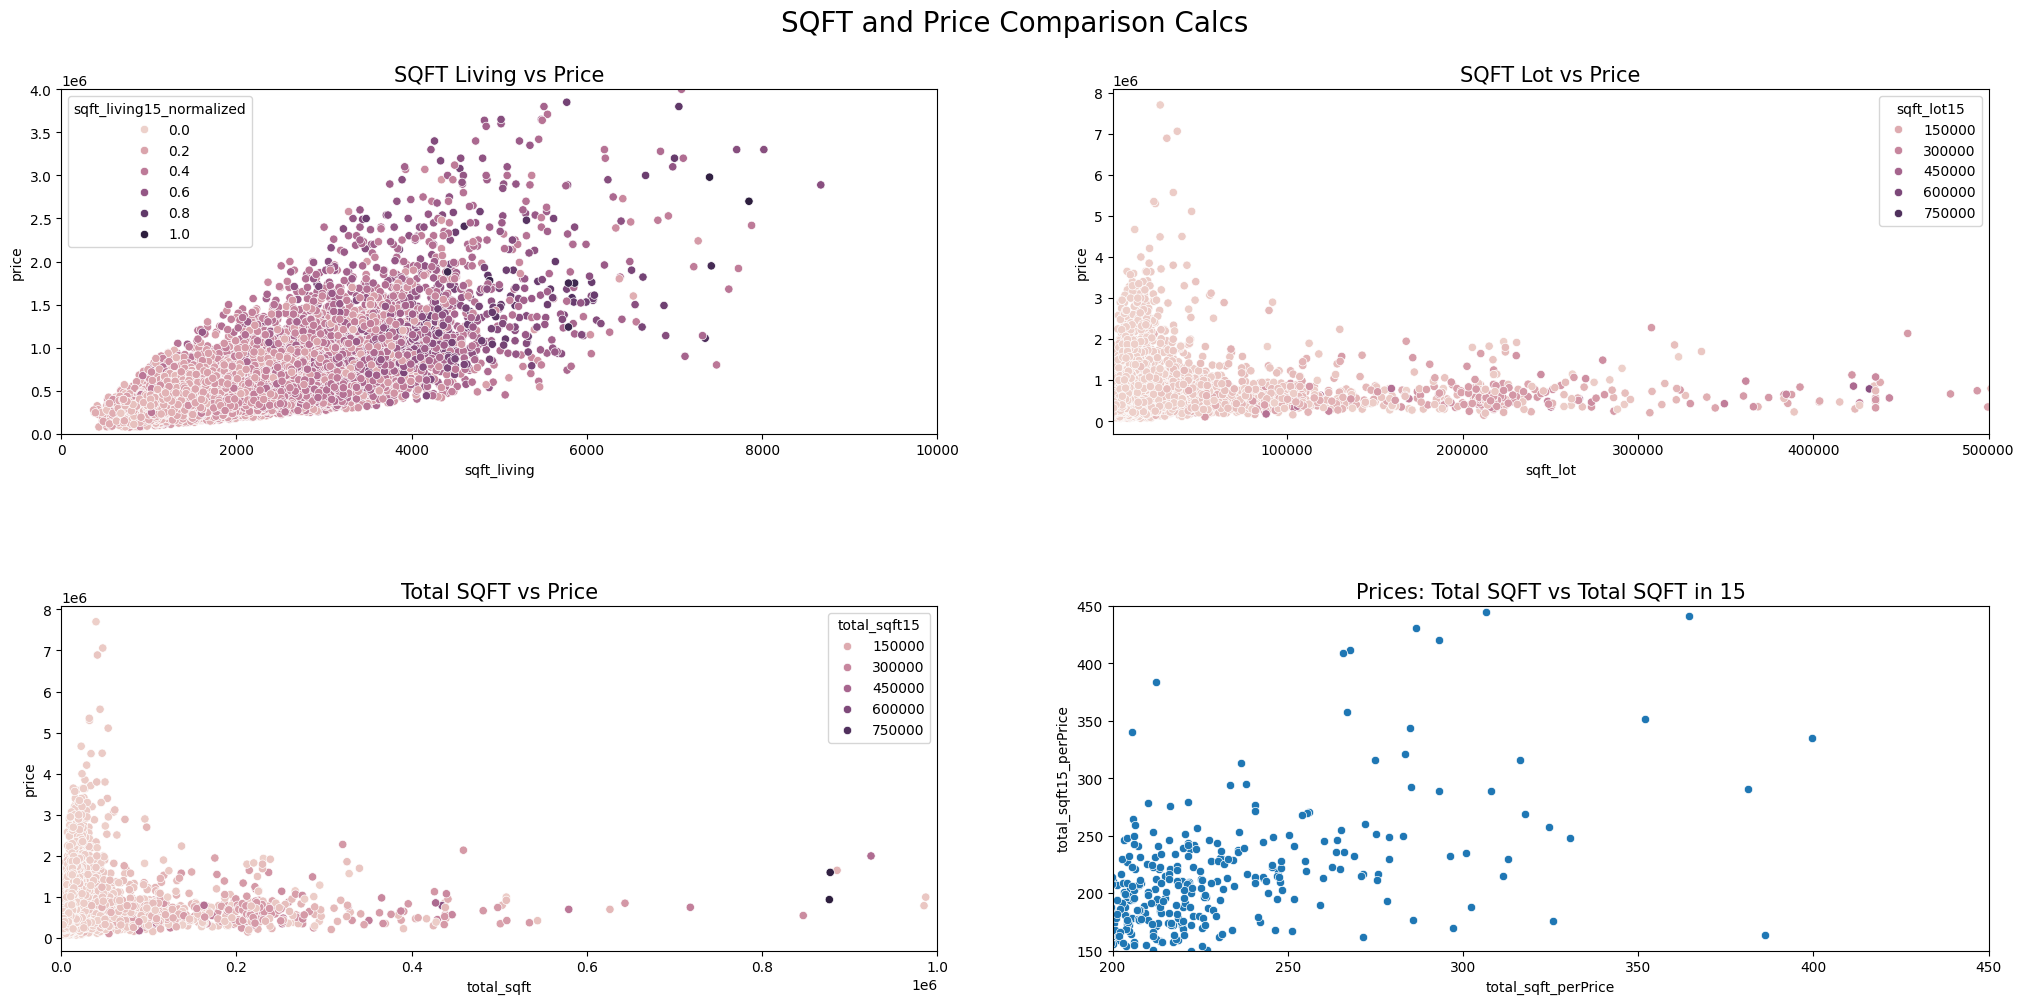

In [20]:
## Further exploring the data and getting an overview

fig, ax = plt.subplots(2,2, figsize=(20,10)) # create subplots on 2 rows and 2 columns
plt.suptitle('SQFT and Price Comparison Calcs', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

sns.scatterplot(data=df, x='sqft_living', y='price', hue='sqft_living15_normalized', ax=ax[0][0]) # creates boxplot for number of views
ax[0][0].set_ylim(0,4000000) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_xlim(0,10000)
ax[0][0].set_title("SQFT Living vs Price", fontsize = 15); # sets title for subplot

sns.scatterplot(data=df, x='sqft_lot', y='price', hue='sqft_lot15', ax=ax[0][1]) # creates boxplot for number of views
#ax[0][1].set_ylim(0,5000000) # limits the y-axis values from 0 to 2000000 
ax[0][1].set_xlim(400,500000)
ax[0][1].set_title("SQFT Lot vs Price", fontsize = 15); # sets title for subplot

sns.scatterplot(data=df, x='total_sqft', y='price', hue='total_sqft15', ax=ax[1][0]) # creates boxplot for number of views
#ax[1][0].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
ax[1][0].set_xlim(0,1000000)
ax[1][0].set_title("Total SQFT vs Price", fontsize = 15); # sets title for subplot

## Creating variables for total sqft and total sqft15 divided by price
df['total_sqft_perPrice'] = df['price'] / df['total_sqft']
df['total_sqft15_perPrice'] = df['price'] / df['total_sqft15']

sns.scatterplot(data=df, x='total_sqft_perPrice', y='total_sqft15_perPrice', ax=ax[1][1]) # creates boxplot for number of views
ax[1][1].set_ylim(150,450)
ax[1][1].set_xlim(200,450)
ax[1][1].set_title("Prices: Total SQFT vs Total SQFT in 15", fontsize = 15); # sets title for subplot


#fig.delaxes(ax[1][2]);

I was looking to get an overview of these different plots side-by-side.
1. Living space and price are tightly correlated
2. Lot vs Price shows us that increasing lot size does happen - but is likely a factor of distance outside the city (Will plot late on that)
3. Combining lot and living: total SQFT seems to track like lot does
4. How many places have high total sqft and total sqft in 15?

# Customer Profile:
### Nicole Johnson 
Wants: 
1. Lively, central neighborhood
2. Middle price range
3. Right timing (within a year) -- Wants to move in quickly/within a year

Text(0.5, 1.0, 'Filtered Count of properties with good SQFT per Price')

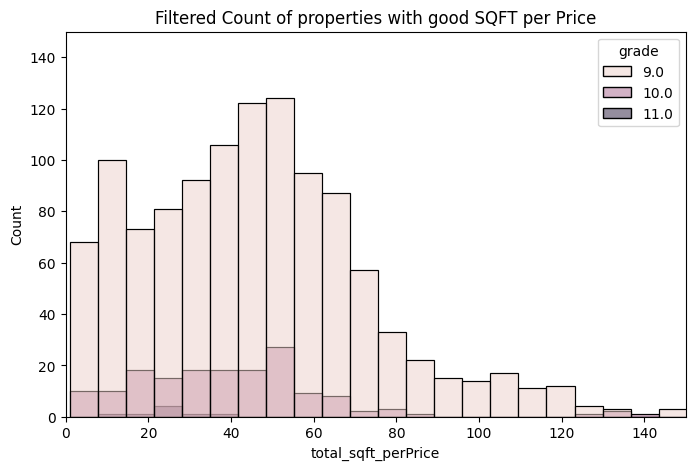

In [19]:
## Now to lower the count of total properties

# We want houses that are good condition (so she can move in quickly)
# We want houses that are not too expensive

# Creating a grade + price filter, choosing above 8 and prices less than 700,000
grade_price_filtered = df[(df['grade'] > 8) & (df['price'] < 700000)]

## Creating variables for total sqft and total sqft15 divided by price
df['total_sqft_perPrice'] = df['price'] / df['total_sqft']
df['total_sqft15_perPrice'] = df['price'] / df['total_sqft15']

sns.histplot(data=grade_price_filtered, x=df['total_sqft_perPrice'], hue='grade')
plt.ylim(0,150)
plt.xlim(0,150)

plt.title(
    label='Filtered Count of properties with good SQFT per Price'
)

## Count is now 1395 entries

#grade_price_filtered.describe()
#grade_price_filtered.info()



Here we have lowered the amount of houses according to Nicole's wants. The plot shows total SQFT per price, including a "hue" for grades. Within a medium price range we find some grade 9, 10, 11s. But we haven't factored in the distance yet.

## Digging deeper into the above plot
She wants to live in a lively neighborhood, so we need areas downtown <br/>
#Lively, central neighborhood

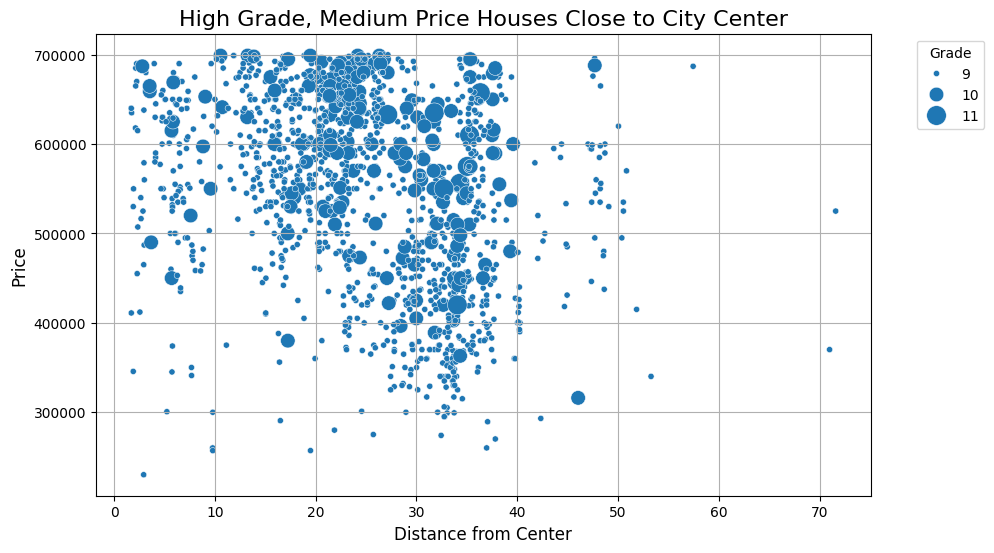

In [21]:
## Plotting Grade Price according to distance from Seattle center

## Determine the distance from Seattle city centre
seattle_lat, seattle_long = 47.608013, -122.335167

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2) * sin(dlon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c


df['distance_from_center'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], seattle_lat, seattle_long), axis=1
)

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grade_price_filtered,
    x='distance_from_center',
    y='price',
    size='grade',
    sizes=(20, 200),
    palette='coolwarm'
)

# Customize the plot
plt.title("High Grade, Medium Price Houses Close to City Center", fontsize=16)
plt.xlabel("Distance from Center", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()





This shows that there are a lot of houses in this set that are not far from the center of Seattle!

We still have too many points, so let's build a scoring system to rank the results.

## Scoring System

Time to build a scoring system to find the ultimate house for Nicole

In [22]:
## Creating score values and normalizing them (0-1)

# Normalize values, create score and get ready to plug these values into our overall algorithmic weight calculation

gp = grade_price_filtered

gp['sqft_per_price'] = gp['sqft_living'] / gp['price'] ## Building sqft / price

gp['price_score'] = (gp['sqft_per_price'] - gp['sqft_per_price'].min()) / (gp['sqft_per_price'].max() - gp['sqft_per_price'].min())

# Normalize to 0-1
gp['distance_score'] = 1 - (gp['distance_from_center'] / gp['distance_from_center'].max())  

gp['condition_grade_score'] = (gp['condition'] + gp['grade']) / (gp['condition'].max() + gp['grade'].max()) 


### Use this if you want to adjust a set price range

price_range = (400000, 700000)  # Example middle price range
gp['price_score'] = gp['price'].apply(
    lambda x: 1 if price_range[0] <= x <= price_range[1] else 0
)

# Combine weighted scores - this can be tweaked to adjust values
weights = {
    'distance_score': 0.8,
    'price_score': 0.1,
    'condition_grade_score': 0.1
}


gp['suitability_score'] = (
    gp['distance_score'] * weights['distance_score'] +
    gp['price_score'] * weights['price_score'] +
    gp['condition_grade_score'] * weights['condition_grade_score']
)

gp


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,total_sqft15,sqft_living15_normalized,total_sqft_perPrice,total_sqft15_perPrice,distance_from_center,sqft_per_price,price_score,distance_score,condition_grade_score,suitability_score
15,2015-01-24,650000,9297300055,4,3,2950,5000,2,0,3,...,6140,0.300,81.761,105.863,5.050,0.005,1,0.929,0.750,0.919
40,2014-07-15,625000,5547700270,4,2,2570,5520,2,0,0,...,8139,0.356,77.256,76.791,23.112,0.004,1,0.677,0.750,0.717
87,2014-06-18,461000,3342103156,3,3,2770,6278,2,0,0,...,9249,0.258,50.950,49.843,13.934,0.006,1,0.805,0.750,0.819
99,2014-05-16,437500,7338200240,3,2,2320,36847,2,0,2,...,37615,0.370,11.170,11.631,48.625,0.005,1,0.321,0.750,0.432
108,2015-03-05,680000,1853000400,4,2,3140,28037,2,0,0,...,37991,0.446,21.811,17.899,23.336,0.005,1,0.674,0.875,0.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,2014-10-03,594866,7853420110,3,3,2780,6000,2,0,0,...,8850,0.422,67.752,67.216,35.144,0.005,1,0.509,0.750,0.582
21565,2015-05-04,625000,7853420110,3,3,2780,6000,2,0,0,...,8850,0.422,71.185,70.621,35.144,0.004,1,0.509,0.750,0.582
21580,2014-08-13,679950,7502800100,5,2,3600,9437,2,0,0,...,12971,0.542,52.155,52.421,20.750,0.005,1,0.710,0.750,0.743
21582,2014-10-13,541800,8956200760,4,2,3118,7866,2,0,2,...,9173,0.391,49.326,59.065,35.423,0.006,1,0.505,0.750,0.579


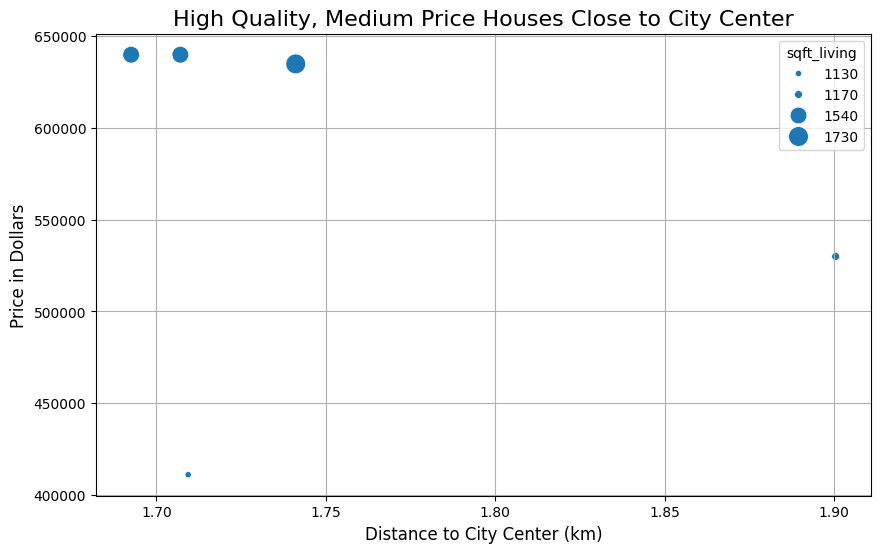

In [23]:
## Creating list of top 5 properties and then plotting

top_properties = gp.sort_values(by='suitability_score', ascending=False).head(5)

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_properties,
    x='distance_from_center',
    y='price',
    size='sqft_living',
    sizes=(20, 200),
    palette='viridis'
)


# Customize the plot
plt.title("High Quality, Medium Price Houses Close to City Center", fontsize=16)
plt.xlabel("Distance to City Center (km)", fontsize=12)
plt.ylabel("Price in Dollars", fontsize=12)
plt.grid(True)
plt.show()


We have found 5 properties that made it through the algorithm and rose to the top, based on their:
1. distance_score = 0.8,
2. price_score = 0.1,
3. condition_grade_score = 0.1

This could be adjusted and either values changed or a bigger list given to the client.

In [35]:
## Taking a closer look at the 5 properties

top_properties_view = top_properties[['house_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view', 'distance_score', 'sqft_per_price', 'suitability_score', 'lat', 'long']]

# Display the results
print(top_properties_view)



         house_id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
20185  6003500743  640000         2          2         1540       958       3   
20869  6003500749  640000         2          2         1540       965       3   
20770     7600136  411000         2          2         1130      1148       2   
6234   6848200221  635000         3          3         1730      1349       3   
12522  6003001999  530000         2          1         1170       976       2   

       waterfront  view  distance_score  sqft_per_price  suitability_score  \
20185           0     0           0.976           0.002              0.956   
20869           0     0           0.976           0.002              0.956   
20770           0     0           0.976           0.003              0.956   
6234            0     0           0.976           0.003              0.956   
12522           0     0           0.973           0.002              0.954   

         lat     long  
20185 47.618 -122.31

## Going to organize and export lists to CSV for data and presentation

In [31]:
# Including list of top 100 properties
top_properties100 = gp.sort_values(by='suitability_score', ascending=False).head(100)
top_properties100clean = top_properties100[['house_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view', 'distance_score', 'sqft_per_price', 'suitability_score', 'lat', 'long', 'zipcode']]


# Exporting to CSV for data collection
csv_path = 'data/top100_houses.csv'
top_properties100clean.to_csv(csv_path, index=False)


In [32]:
top5_houses_clean = top_properties[['house_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view', 'distance_score', 'sqft_per_price', 'suitability_score', 'lat', 'long', 'zipcode']]

# Showing relevant values
print(top5_houses_clean)

         house_id   price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
20185  6003500743  640000         2          2         1540       958       3   
20869  6003500749  640000         2          2         1540       965       3   
20770     7600136  411000         2          2         1130      1148       2   
6234   6848200221  635000         3          3         1730      1349       3   
12522  6003001999  530000         2          1         1170       976       2   

       waterfront  view  distance_score  sqft_per_price  suitability_score  \
20185           0     0           0.976           0.002              0.956   
20869           0     0           0.976           0.002              0.956   
20770           0     0           0.976           0.003              0.956   
6234            0     0           0.976           0.003              0.956   
12522           0     0           0.973           0.002              0.954   

         lat     long  zipcode  
20185 47.61

In [37]:
# Exporting the current top houses into a CSV file

csv_path = 'data/top5_houses.csv'
top5_houses_clean.to_csv(csv_path, index=False)

## Testing Hypotheses
Going over Hypothesis 1, 2, 3 testing

# HYPOTHESIS 1
## Places within the city will be smaller and cost more than houses away from the centre, which will be bigger and cost less


In [28]:

# CALCULATING PRICE VS DISTANCE

## DISTANCE CALC

# Seattle Center coordinates
seattle_lat, seattle_long = 47.608013, -122.335167

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in km
    R = 6371.0
    
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance in km
    distance = R * c
    return distance


# Calculate distance to Seattle center for each house
df['distance_to_seattle'] = df.apply(lambda row: haversine(row['lat'], row['long'], seattle_lat, seattle_long), axis=1)



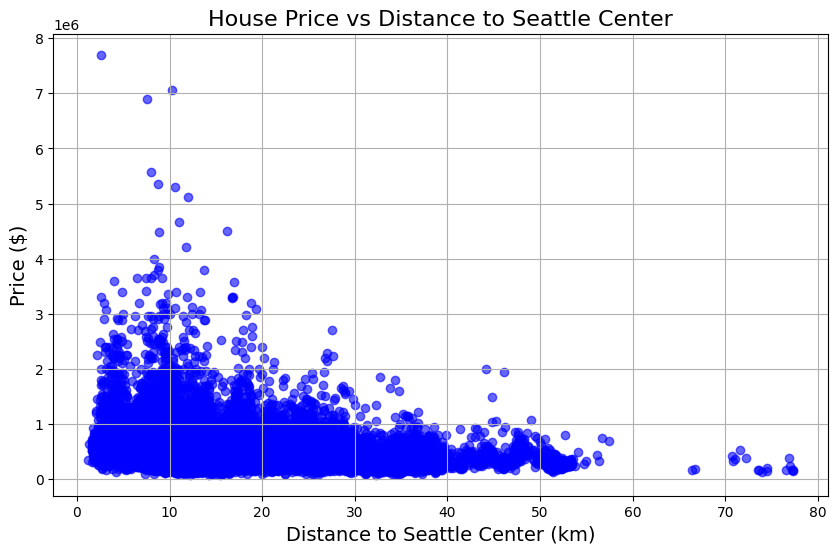

In [47]:
# Scatter plot for price vs distance to Seattle center
plt.figure(figsize=(10, 6))
plt.scatter(df['distance_to_seattle'], df['price'], color='blue', alpha=0.6)

# Set labels and title
plt.title("House Price vs Distance to Seattle Center", fontsize=16)
plt.xlabel("Distance to Seattle Center (km)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

# Show grid and plot
plt.grid(True)
plt.show()


This plot shows the prices relative to the distance. We can see that prices don't always go up as we get further away. Maybe due to size of the houses?

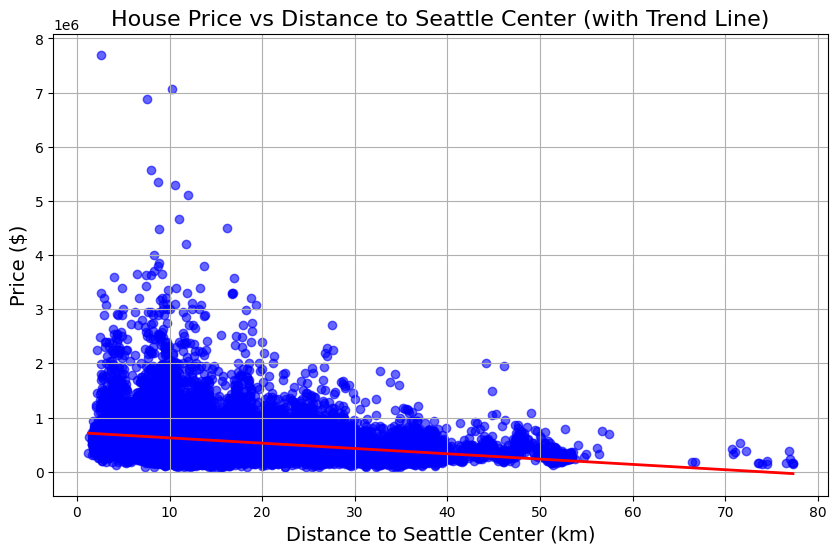

In [169]:
## REGRESSION

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='distance_to_seattle', y='price', data=df, scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})

# Set labels and title
plt.title("House Price vs Distance to Seattle Center (with Trend Line)", fontsize=16)
plt.xlabel("Distance to Seattle Center (km)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

# Show grid and plot
plt.grid(True)
plt.show()

This plot shows the prices relative to the distance. We have set regression to show the trend. It's actually going down!

In [100]:
## I wnat to see how the living space is plotting as a hue, best to use a normalized value

## Creating a normalized sqft value to use as a hue

df['sqft_living_normalized'] = (df['sqft_living'] - df['sqft_living'].min()) / (df['sqft_living'].max() - df['sqft_living'].min())

# Show the DataFrame to verify the new normalized column
print(df[['house_id', 'sqft_living', 'sqft_living_normalized']])

         house_id  sqft_living  sqft_living_normalized
0      7129300520         1180                   0.062
1      6414100192         2570                   0.167
2      5631500400          770                   0.030
3      2487200875         1960                   0.121
4      1954400510         1680                   0.099
...           ...          ...                     ...
21592   263000018         1530                   0.088
21593  6600060120         2310                   0.147
21594  1523300141         1020                   0.049
21595   291310100         1600                   0.093
21596  1523300157         1020                   0.049

[21597 rows x 3 columns]


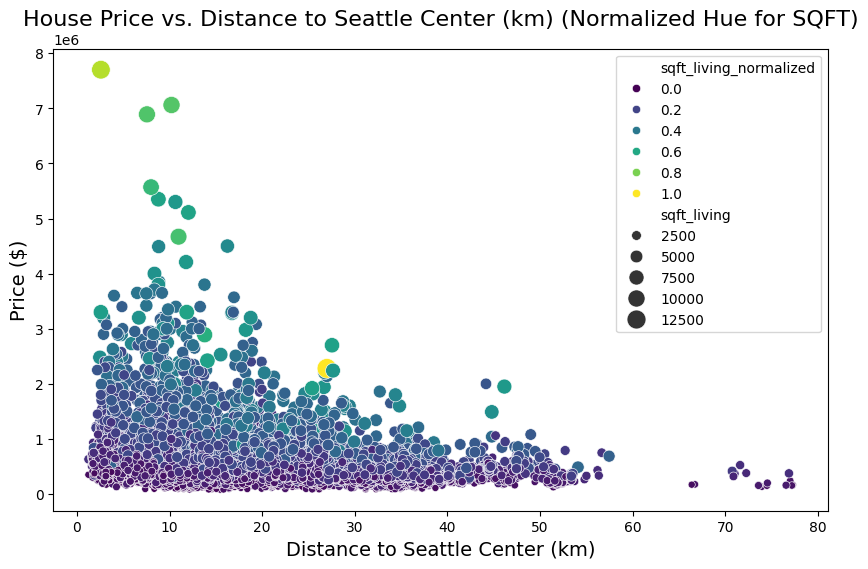

In [101]:
## Adding the HUE

# Create a scatter plot using seaborn with the normalized 'sqft_living' as the hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_to_seattle', y='price', hue='sqft_living_normalized', palette='viridis', size='sqft_living', sizes=(20, 200))

# Add labels and title
plt.title("House Price vs. Distance to Seattle Center (km) (Normalized Hue for SQFT)", fontsize=16)
plt.xlabel("Distance to Seattle Center (km)", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)

# Show the plot
plt.show()


Here we see most values are small and low in price and inside Seattle. Going along X, we don't have a sharp increase in price but also not in size.
The biggest size values to see by color and hue are found purely along the Y axis - based on increasing price you find the bigger houses. They are not necessarily cheaper nor bigger outside the city. But it seems to track that houses are more expensive in the city and also smaller.

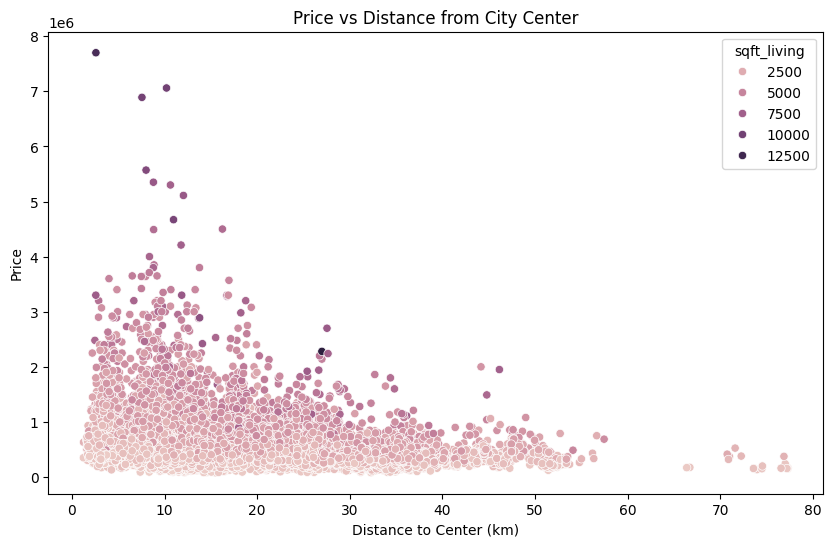

In [103]:
# Plotting Price vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_seattle', y='price', hue='sqft_living', data=df)
plt.title('Price vs Distance from City Center')
plt.xlabel('Distance to Center (km)')
plt.ylabel('Price')
plt.show()


Plotting again to show a cleaner version, price vs distance with a hue for living size.

Dark spots in the top left show the huge, expensive houses near to the center of the city

In [104]:
# Calculate correlation between price and distance
price_distance_corr = df['price'].corr(df['distance_to_seattle'])
print(f'Correlation between price and distance: {price_distance_corr}')

# Calculate correlation between sqft_living and distance
sqft_distance_corr = df['sqft_living'].corr(df['distance_to_seattle'])
print(f'Correlation between sqft_living and distance: {sqft_distance_corr}')


Correlation between price and distance: -0.2864763687636491
Correlation between sqft_living and distance: 0.07577580001819821


Correlation between price and distance: -0.2864763687636491
<br/>
Correlation between sqft_living and distance: 0.07577580001819821

# Hypothesis 2
## Houses that have renovated will sell at a higher price

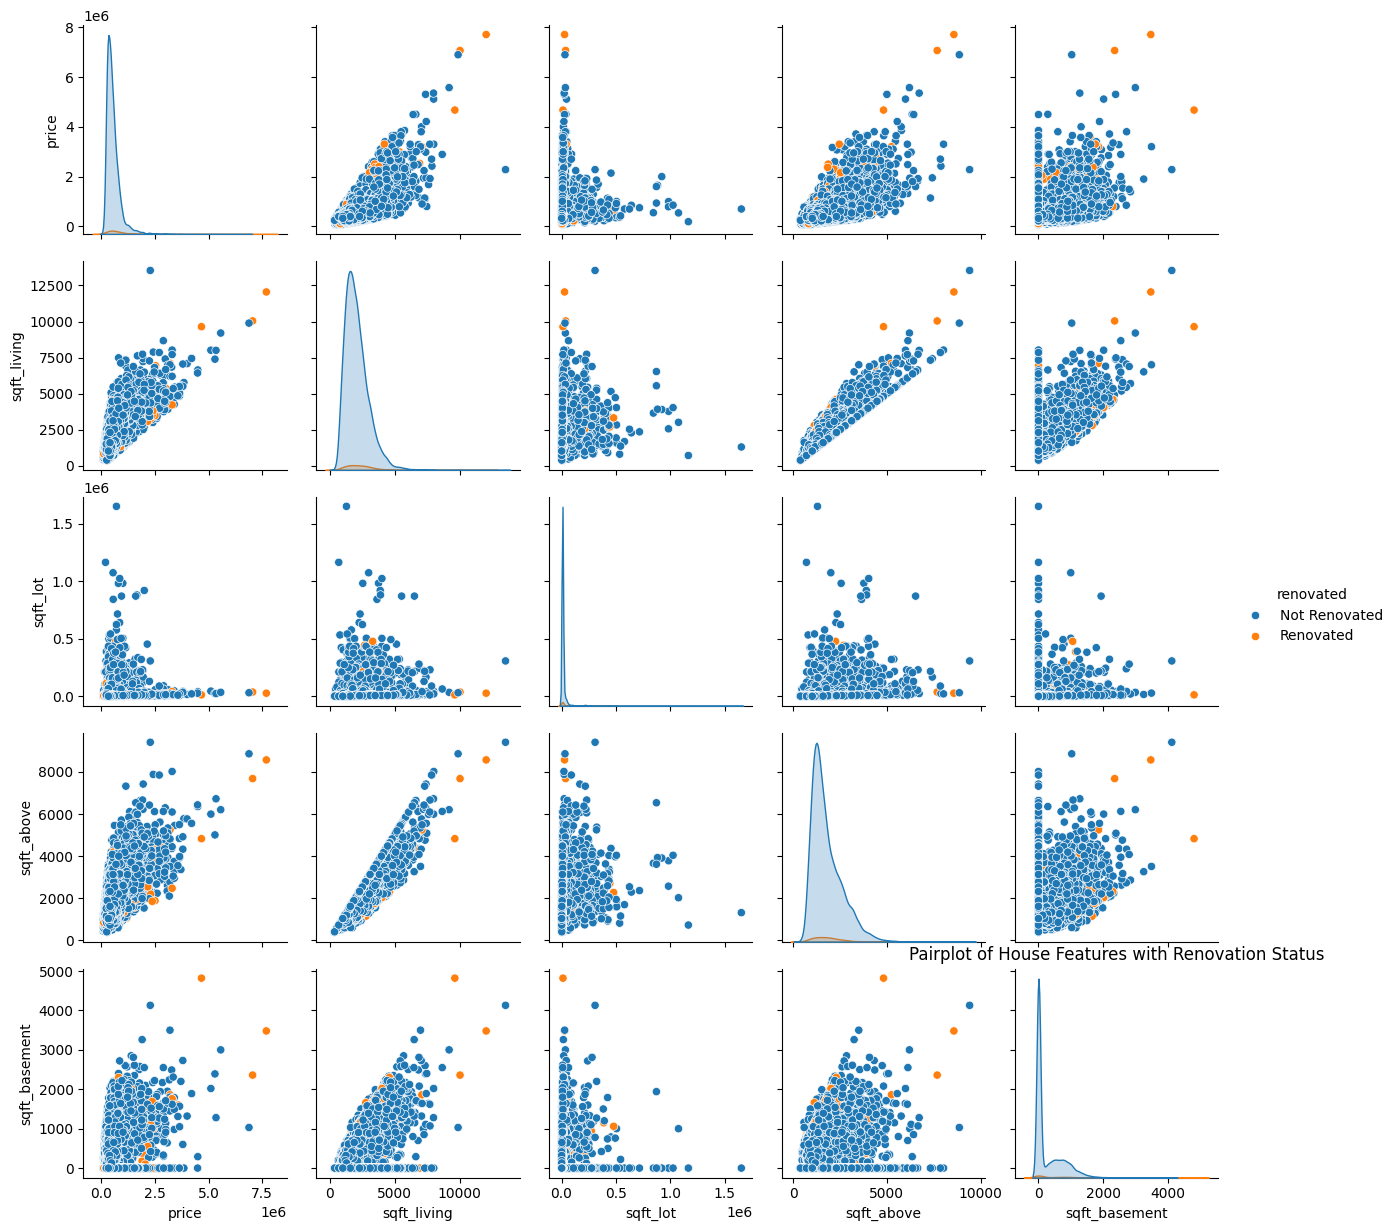

In [41]:

# Create a new column to categorize houses
df['renovated'] = df['yr_renovated'].notnull() & (df['yr_renovated'] > df['yr_built'])
df['renovated'] = df['renovated'].replace({True: 'Renovated', False: 'Not Renovated'})


sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'renovated']], hue='renovated')
plt.title('Pairplot of House Features with Renovation Status')
plt.show()




Getting an overview of what plots will look like based on many variables. I will plot with Price as the Y and look to see what we find.

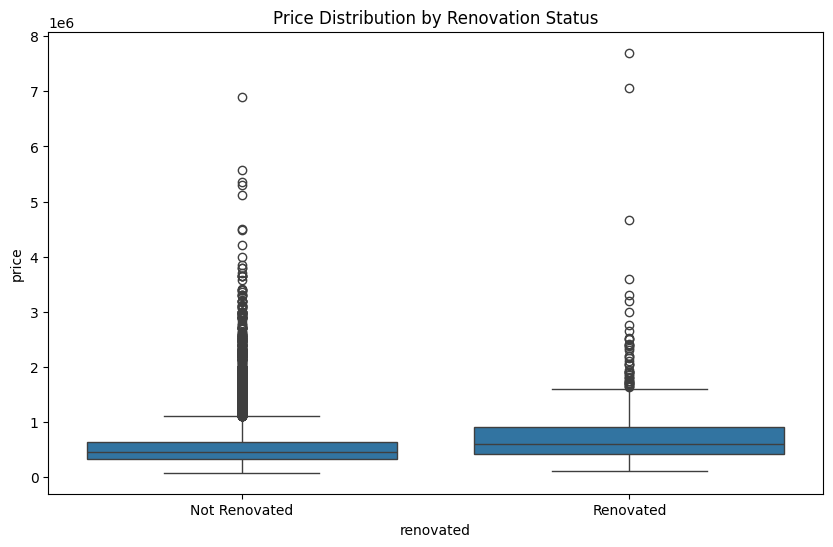

In [42]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='renovated', y='price', data=df)
plt.title('Price Distribution by Renovation Status')
plt.show()

Quite a crazy amount of outliers, but we already see that the renovated box is higher.

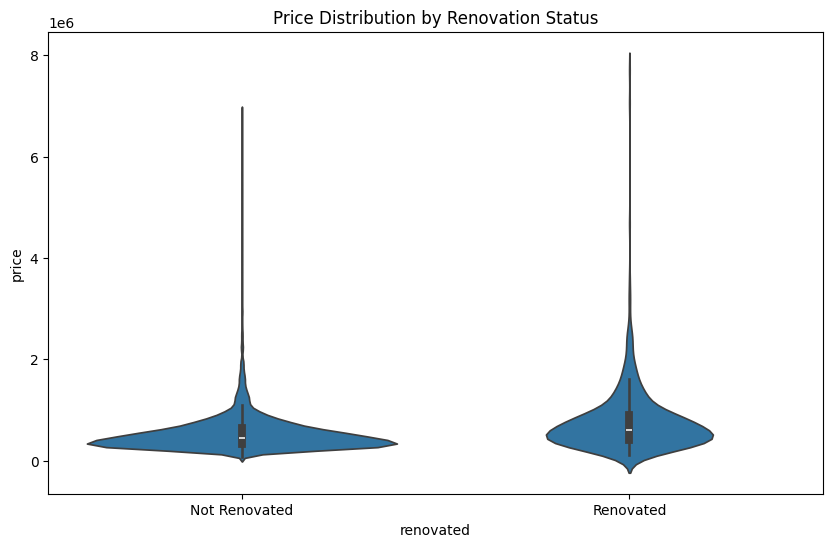

In [43]:
# Trying Violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='renovated', y='price', data=df)
plt.title('Price Distribution by Renovation Status')
plt.show()

Violin plot is just like box plot, showing that renovated has a higher bulk when compared

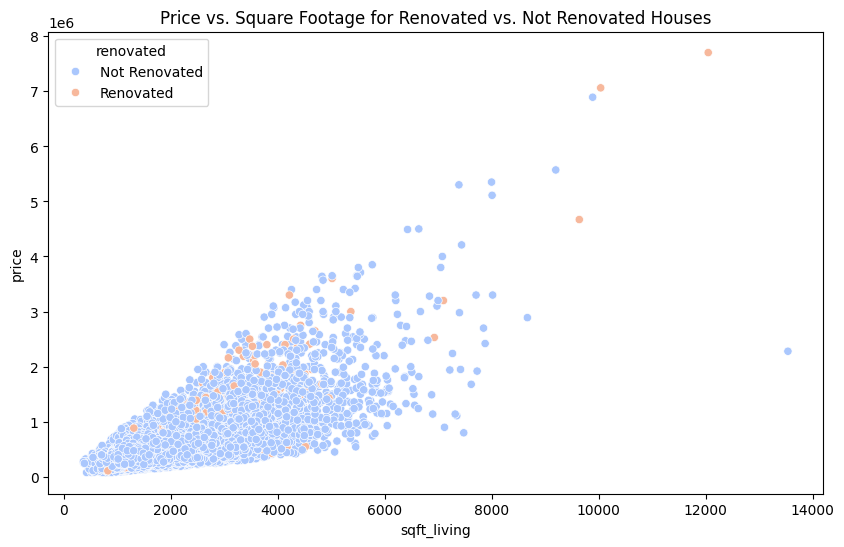

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', hue='renovated', data=df, palette='coolwarm')
plt.title('Price vs. Square Footage for Renovated vs. Not Renovated Houses')
plt.show()


Plotting price vs sqft to see how the orange colored renovated show up. As expected, near the top end of price values

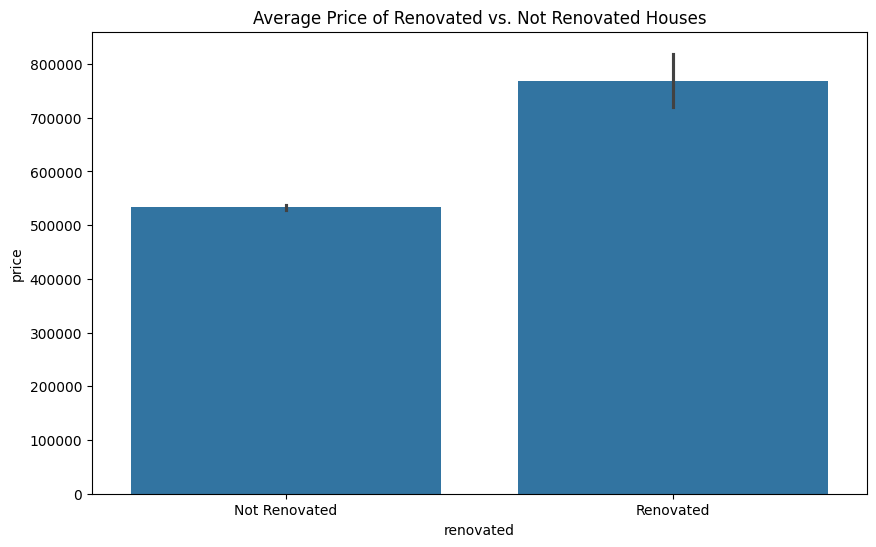

In [45]:
# Calculate the mean price for each renovation status
plt.figure(figsize=(10, 6))
sns.barplot(x='renovated', y='price', data=df, estimator='mean')
plt.title('Average Price of Renovated vs. Not Renovated Houses')
plt.show()


Bar plot looking good, this really shows how the renovated column can rise above non-renovated

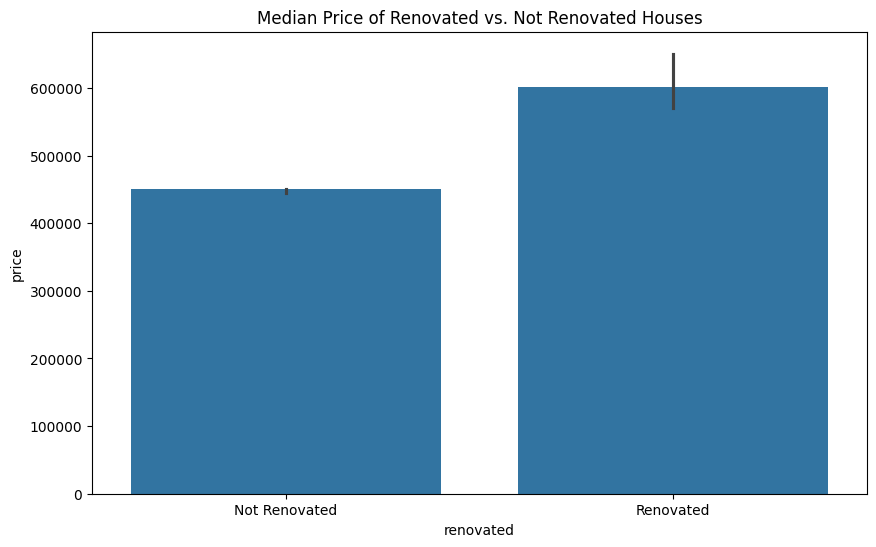

In [67]:
# Calculate the median price for each renovation status
plt.figure(figsize=(10, 6))
sns.barplot(x='renovated', y='price', data=df, estimator='median')
plt.title('Median Price of Renovated vs. Not Renovated Houses')
plt.show()


Switching from mean to median has little effect, but gives us a strong showing that renovated is more.

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='renovated', kde=True, multiple='stack')
plt.title('Price Distribution by Renovation Status')
plt.show()


ValueError: Could not interpret value `renovated` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

Curious to see the overall count of data, how many houses and how many are renovated. Our sample size for renovated is a small percentage of total houses, but when price goes up that number gets smaller...

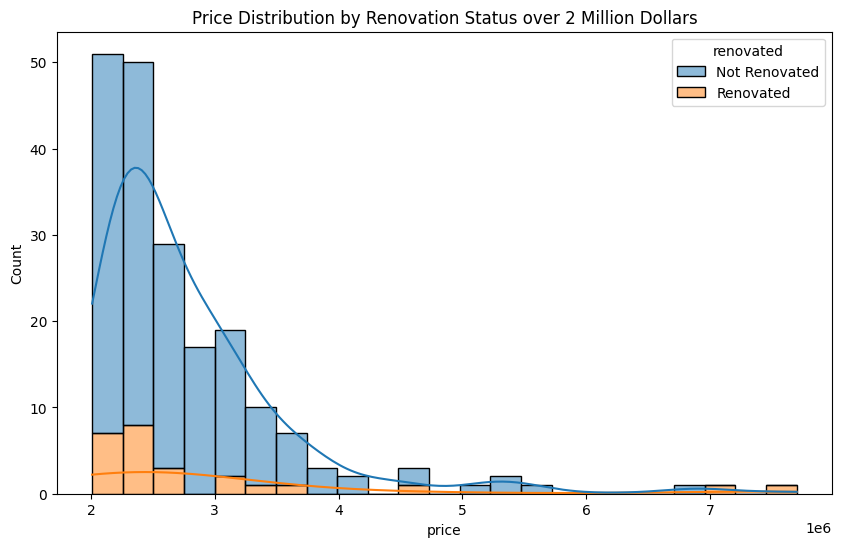

In [46]:
#df_price_limit = df[(df['price'] > 1000000)]
df_price_limit = df[(df['price'] > 2000000)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_price_limit, x='price', hue='renovated', kde=True, multiple='stack')
plt.title('Price Distribution by Renovation Status over 2 Million Dollars')
plt.show()


As expected, when price goes up, there's a higher percentage of renovated properties. People making $$$$

# HYPOTHESIS 3
## House size will have increasing returns on its price

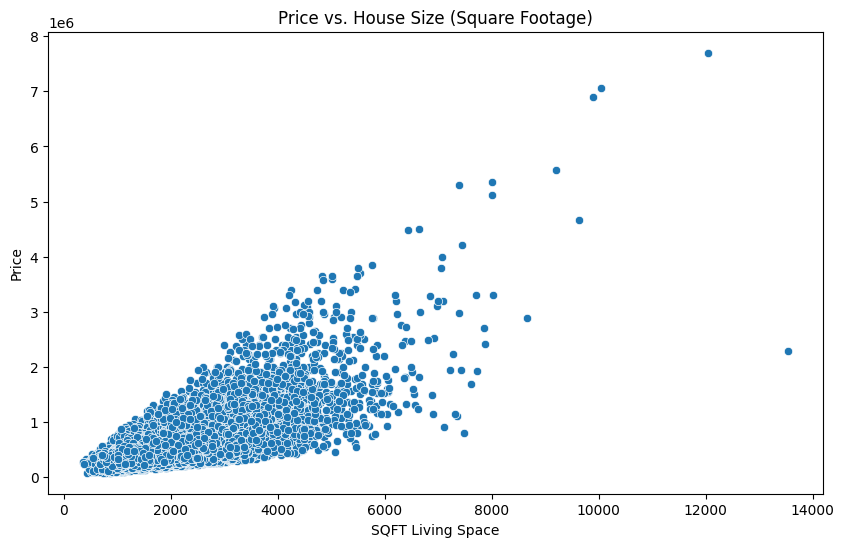

In [122]:


# Create a scatter plot to show the raw relationship between sqft_living and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs. House Size (Square Footage)')
plt.xlabel('SQFT Living Space')
plt.ylabel('Price')
plt.show()



Overall view of price vs square footage - living space

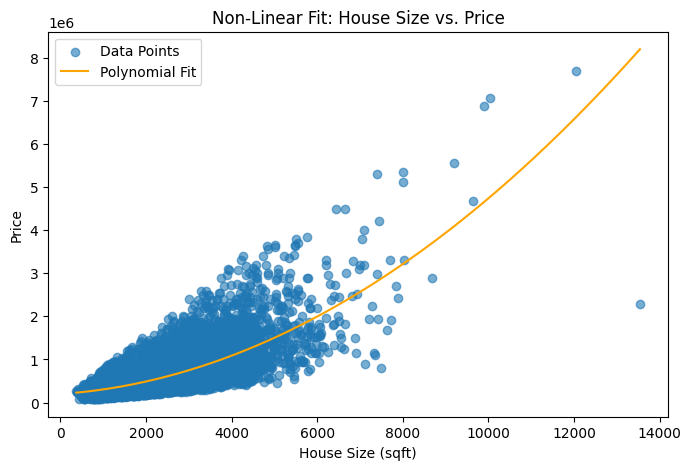

In [123]:
x = df['sqft_living'].values
y = df['price'].values

# Fit polynomial regression (degree=2 for curvature)
coeffs = np.polyfit(x, y, 2)  # Returns coefficients of the polynomial
poly_eq = np.poly1d(coeffs)   # Create a polynomial equation object

# Predict values for plotting
x_pred = np.linspace(x.min(), x.max(), 500)
y_pred = poly_eq(x_pred)

# Plot
plt.scatter(x, y, label='Data Points', alpha=0.6)
plt.plot(x_pred, y_pred, color='orange', label='Polynomial Fit')
plt.title('Non-Linear Fit: House Size vs. Price')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()

Plotting to assess the value increase. We have a very positive increase here!

In [127]:
# Calculate correlation between price and sqft_living
price_sqft_corr = df['price'].corr(df['sqft_living'])
print(f'Correlation between price and sqft_living: {sqft_distance_corr}')

Correlation between price and sqft_living: 0.07577580001819821


That is the end of the notebook and EDA project. I hoped you enjoyed it!

In [ ]:
[df.columns]